# ue2, Jack Heseltine
## 2.2

4  sample solutions
[7, 1, 5, 2, 3, 4, 8, 6]
[7, 1, 2, 3, 4, 5, 8, 6]
[7, 1, 2, 3, 5, 4, 8, 6]
[7, 1, 2, 5, 3, 4, 8, 6]


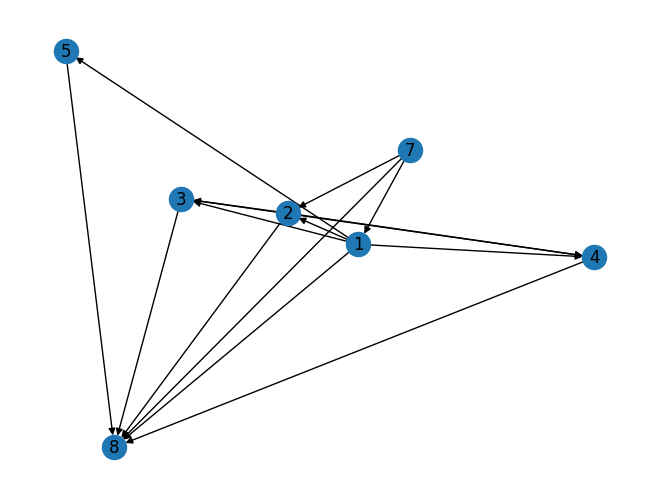

In [1]:
import networkx as nx

DG = nx.DiGraph([(1,2),(1,3),(1,4),(1,5),(1,8),(2,3),(2,4),(2,8),(3,4),(3,8),(4,8),(5,8),(7,1),(7,2),(7,8)])
#DG.add_nodes_from([6]) # 6 to get full graph
nx.draw(DG, with_labels=True)

TS = list(nx.all_topological_sorts(DG))
print(len(TS), " sample solutions")
for t in TS:
    print(t + [6]) # gives the topological sort options of the nodes, add node 6 for completeness

## 2.3

implication graph:


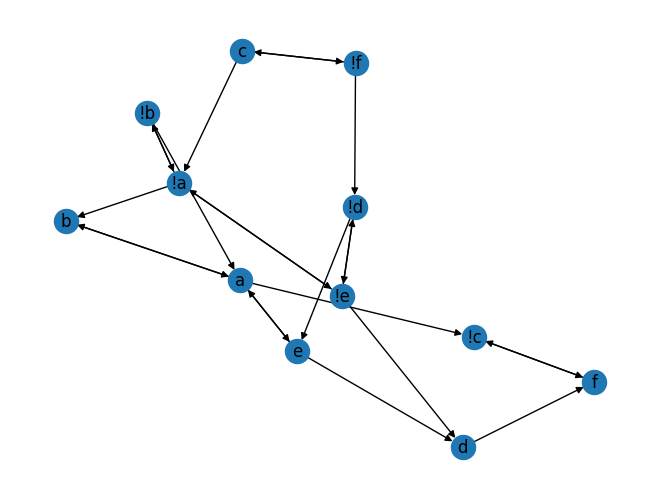

condensation graph:


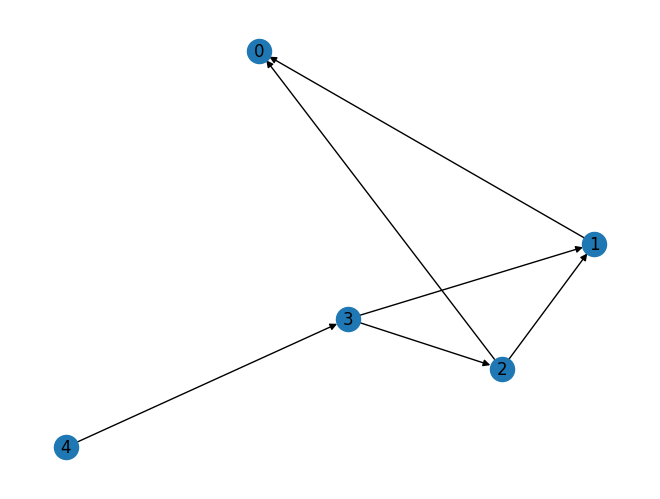

processing assignments ...
0 :  {'!c', 'f'}
1 :  {'d'}
2 :  {'a', 'b', 'e'}
3 :  {'!a', '!d', '!b', '!e'}
4 :  {'c', '!f'}
...
{'!c': True, 'c': False, 'f': True, '!f': False, 'd': True, '!d': False, 'a': True, '!a': False, 'b': True, '!b': False, 'e': True, '!e': False}
- compare to original formula: 
(!a || b) && (a || !b) && (a || b) && (!a || !c) && (!d || e) && (d || !e) && (d || e) && (!d || f) && (!c || !f) && (c || f) && (a || !e) && (!a || e)
The formula evaluates to: True


In [11]:
import matplotlib.pyplot as plt


graph = nx.DiGraph()

edges = [
    ("a", "b"), ("!b", "!a"), # (a -> b) <=> (!b -> !a)
    ("!a", "!b"), ("b", "a"), # (!a -> !b) <=> (b -> a)
    ("!a", "b"), ("!b", "a"), # (!a -> b) <=> (!b -> a)
        # see handwritten notes for manual process up to this line
    ("a", "!c"), ("c", "!a"), # (a -> !c) <=> (c -> !a) 
    ("!d", "e"), ("!e", "!d"), # (!d -> e) <=> (!e -> !d)
    ("!d", "!e"), ("e", "d"), # (!d -> !e) <=> (e -> d)
    ("!d", "e"), ("!e", "d"), # (!d -> e) <=> (!e ->d)
    ("d", "f"), ("!f", "!d"), # (d -> f) <=> (!f -> !d)
    ("c", "!f"), ("f", "!c"), # (c -> !f) <=> (f -> !c)
    ("!c", "f"), ("!f", "c"), # (!c -> f) <=> (!f -> c)
    ("!a", "!e"), ("e", "a"), # (!a -> !e) <=> (e -> a)
    ("a", "e"), ("!e", "!a"), # (a -> e) <=> (!e -> !a)
]
graph.add_edges_from(edges)

# implication graph
print("implication graph:")
nx.draw(graph, with_labels=True)
plt.show()

# get strongly connected components
components = list(nx.strongly_connected_components(graph))

# check if strongly connected components contain varialbe and their negation
for component in components:
    for node in component:
        if node.startswith('!'):
            if node[1:] in component:
                print('Unsolvable because the component contains a variable and its negation.')
                exit(0)


condensation_graph = nx.condensation(graph)

print("condensation graph:")
nx.draw(condensation_graph, with_labels=True)
plt.show()

# Traverse the condensation graph in reverse topological order.
reverse_topological_order = reversed(list(nx.topological_sort(condensation_graph)))
#print("reverse topological order of the condensation graph: " + str(list(reverse_topological_order)))
# understanding python _> why can I not uncomment this line? It looks like it changes the variable content of reverse_topological_order

# initialize
assignment = {}

def complement(var):
    # strip negation "!" or return with "!" if not negated
    # to perform string negation operation
    return var[1:] if var.startswith('!') else '!' + var

print("processing assignments ...")

for component in reverse_topological_order:
    print(component, ": ", condensation_graph.nodes[component]["members"])

    for c in condensation_graph.nodes[component]["members"]: # variable assignment

        if c not in assignment:
            assignment[c] = True
            assignment[complement(c)] = False

print("...")
print(assignment)

print("- compare to original formula: ")
print("(!a || b) && (a || !b) && (a || b) && (!a || !c) && (!d || e) && (d || !e) && (d || e) && (!d || f) && (!c || !f) && (c || f) && (a || !e) && (!a || e)")

def evaluate_cnf(formula, assignments):
    for clause in formula:
        clause_result = False # default evaluation of clause is false
        for literal in clause:
            if literal[0] == '!':
                var = literal[1:] # remove negation
                literal_result = not assignments.get(var, False) # negation case, apply not
                # get takes two arguments: the key to be looked up and a default value to be returned if the key is not found in the dictionary.
            else:
                var = literal # just get the assignment value
                literal_result = assignments.get(var, False) 
            clause_result = clause_result or literal_result # true if at least one literal result is true
        if not clause_result:
            # works for CNF because if one clause is false, the whole formula is false
            return False
        # true of all clauses are true
    return True

# formula encoded
formula = [['!a', 'b'], ['a', '!b'], ['a', 'b'], ['!a', '!c'], ['!d', 'e'], ['d', '!e'], ['d', 'e'], ['!d', 'f'], ['!c', '!f'], ['c', 'f'], ['a', '!e'], ['!a', 'e']]
result = evaluate_cnf(formula, assignment) # assignment from algorithm

print("The formula evaluates to:", result)